In [22]:
import pandas as pd
import numpy as np
import os, json
import nltk
import importlib
import matplotlib.pyplot as plt

In [2]:
DATAPATH = 'data'
CSV_FILEPATH ="/".join([DATAPATH, 'metadata_ft_subset.csv'])

In [5]:
df_sub = pd.read_csv(CSV_FILEPATH)
print(df_sub.shape)
df_sub.head()

(33499, 19)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url,full_body_text
0,xqhn0vbp,1e1286db212100993d03cc22374b624f7caee956,PMC,Airborne rhinovirus detection and effect of ul...,10.1186/1471-2458-3-5,PMC140314,12525263.0,no-cc,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,"Myatt, Theodore A; Johnston, Sebastian L; Rudn...",BMC Public Health,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Rhinoviruses have been associated with 40% to ...
1,gi6uaa83,8ae137c8da1607b3a8e4c946c07ca8bda67f88ac,PMC,Discovering human history from stomach bacteria,10.1186/gb-2003-4-5-213,PMC156578,12734001.0,no-cc,Recent analyses of human pathogens have reveal...,2003-04-28,"Disotell, Todd R",Genome Biol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Charles Darwin recognized that the distributio...
3,fy4w7xz8,0104f6ceccf92ae8567a0102f89cbb976969a774,PMC,Association of HLA class I with severe acute r...,10.1186/1471-2350-4-9,PMC212558,12969506.0,no-cc,BACKGROUND: The human leukocyte antigen (HLA) ...,2003-09-12,"Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...",BMC Med Genet,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,patient group a further significant increase ...
4,0qaoam29,5b68a553a7cbbea13472721cd1ad617d42b40c26,PMC,A double epidemic model for the SARS propagation,10.1186/1471-2334-3-19,PMC222908,12964944.0,no-cc,BACKGROUND: An epidemic of a Severe Acute Resp...,2003-09-10,"Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine",BMC Infect Dis,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,Since November 2002 (and perhaps earlier) an o...
5,qj4dh6rg,3ed670f60a7be2e3e2a991ea8af1fdd5fa5e2b2c,PMC,Cloaked similarity between HIV-1 and SARS-CoV ...,10.1186/1471-2180-3-20,PMC222911,14499001.0,no-cc,BACKGROUND: Severe acute respiratory syndrome ...,2003-09-21,"Kliger, Yossef; Levanon, Erez Y",BMC Microbiol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,Infection by many enveloped viruses requires f...


In [6]:
MODELS_FILEPATH ="/".join([DATAPATH, 'metadata_models.csv'])

In [7]:
df_models = pd.read_csv(MODELS_FILEPATH)
print(df_models.shape)
df_models.head()

(50, 8)


,model_name,model_type,num_topics,abs_or_full,top_n_grams,hyperparam_dict,avg_topic_coherence,rstd_atc
0,lda_5_2020-04-21 18:58:29,lda,5,abs,1,NaN,0.510975,0.149392
1,lda_10_2020-04-21 22:11:24,lda,10,abs,1,NaN,0.529820,0.114499
2,lda_15_2020-04-21 22:13:29,lda,15,abs,1,NaN,0.521108,0.152109
3,lda_20_2020-04-21 22:15:40,lda,20,abs,1,NaN,0.519769,0.219951
4,lda_25_2020-04-21 22:17:46,lda,25,abs,1,NaN,0.534191,0.183415


In [10]:
import process_tools
importlib.reload(process_tools)

<module 'process_tools' from 'C:\\Users\\Khachatur\\ML-COVID-CORD\\process_tools.py'>

In [19]:
from gensim.corpora import Dictionary

full_docs = process_tools.extract_full_docs(df_sub)
full_docs = process_tools.simple_preprocess(full_docs)
# Create a dictionary representation of the documents.
full_dictionary = Dictionary(full_docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
full_dictionary.filter_extremes(no_below=20, no_above=0.5)
full_corpus = [full_dictionary.doc2bow(doc) for doc in full_docs]
print('Number of unique tokens: %d' % len(full_dictionary))
print('Number of documents: %d' % len(full_corpus))

Number of unique tokens: 57596
Number of documents: 33499


In [11]:
from gensim.models import LdaMulticore
from gensim.models.nmf import Nmf

In [12]:
lda_40 = LdaMulticore.load('models/lda_40/lda_40')
nmf_40 = Nmf.load('models/nmf_40/nmf_40')
nmf_75 = Nmf.load('models/nmf_75/nmf_75')

In [48]:
models_full_df = df_models[df_models['abs_or_full'] == 'full']
lda_models = models_full_df[models_full_df['model_type'] == 'lda']
nmf_models = models_full_df[models_full_df['model_type'] == 'nmf']
NUM_TOPICS_LIST = [10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100]

In [20]:
avg_topic_coherence, rstd_atc, lda_40_topics= process_tools.get_model_stats(lda_40, 'lda', full_docs, full_dictionary, full_corpus, 40, verbose=True, get_topics=True)
avg_topic_coherence, rstd_atc, nmf_40_topics= process_tools.get_model_stats(nmf_40, 'nmf', full_docs, full_dictionary, full_corpus, 40, verbose=True, get_topics = True)
avg_topic_coherence, rstd_atc, nmf_75_topics= process_tools.get_model_stats(nmf_75, 'nmf', full_docs, full_dictionary, full_corpus, 75, verbose=True, get_topics = True)

Average topic coherence:  0.6477830718975954
Relative Standard Deviation of ATC:  0.21576022170579578
Average topic coherence:  0.6634789002193069
Relative Standard Deviation of ATC:  0.14404910596421358
Average topic coherence:  0.6694629883547253
Relative Standard Deviation of ATC:  0.17174313291936077


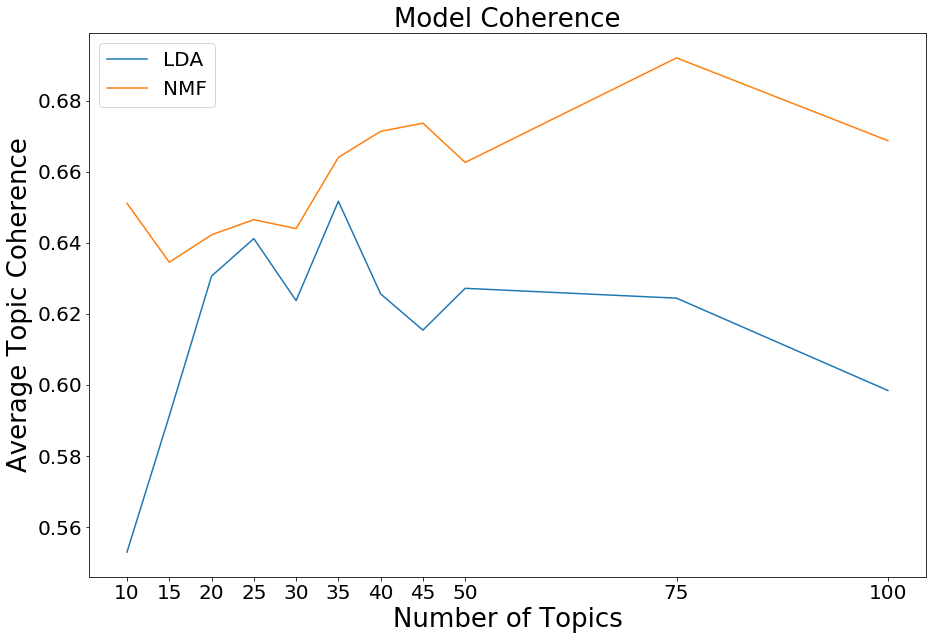

In [50]:
plt.figure(figsize=(15,10))
plt.plot(lda_models['num_topics'], lda_models['avg_topic_coherence'])
plt.plot(nmf_models['num_topics'], nmf_models['avg_topic_coherence'])
plt.legend(['LDA', 'NMF'], loc='upper left')
plt.xticks(NUM_TOPICS_LIST)
plt.xlabel('Number of Topics')
plt.ylabel('Average Topic Coherence')
plt.title('Model Coherence')

SMALL_SIZE = 20
MEDIUM_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.savefig('images/model_coherence.png')

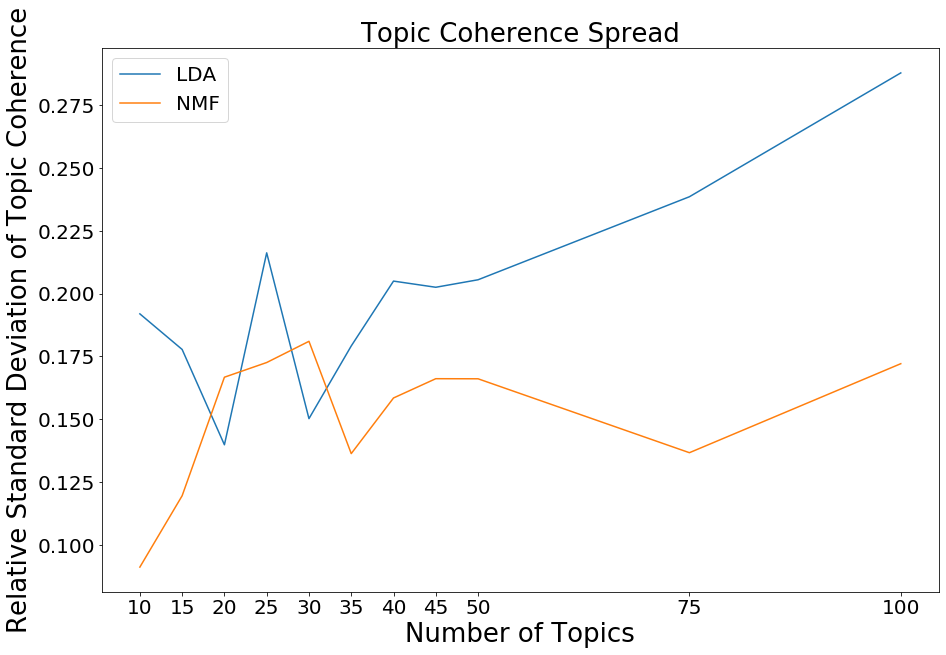

In [51]:
plt.figure(figsize=(15,10))
plt.plot(lda_models['num_topics'], lda_models['rstd_atc'])
plt.plot(nmf_models['num_topics'], nmf_models['rstd_atc'])
plt.legend(['LDA', 'NMF'], loc='upper left')
plt.xticks(NUM_TOPICS_LIST)
plt.xlabel('Number of Topics')
plt.ylabel('Relative Standard Deviation of Topic Coherence')
plt.title('Topic Coherence Spread')

plt.savefig('images/topic_coherence_spread.png')

In [35]:
nmf_40_topics

[([(0.021402928525385004, 'ml'),
   (0.01092548544578882, 'min'),
   (0.009927705209396334, 'mm'),
   (0.007117022356257121, 'incubated'),
   (0.006463665654004367, 'serum'),
   (0.006238362764695473, 'buffer'),
   (0.005999499803341309, 'pbs'),
   (0.005922180427080969, 'anti'),
   (0.005685973955840002, 'assay'),
   (0.005670302308150587, 'concentration'),
   (0.0054516860236582965, 'added'),
   (0.005429273654337317, 'ph'),
   (0.0052515252320513624, 'medium'),
   (0.005039471112355867, 'antibody'),
   (0.004646243383540758, 'purified'),
   (0.004333359628307795, 'temperature'),
   (0.0043211073922684185, 'washed'),
   (0.00412777722460331, 'solution'),
   (0.004106822387525351, 'mg'),
   (0.004064649131717186, 'culture')],
  0.8351631096944612),
 ([(0.019900106772322273, 'frameshifting'),
   (0.01804447840437971, 'codon'),
   (0.017740103190913768, 'mrna'),
   (0.01590967301330071, 'site'),
   (0.015247540135541434, 'translation'),
   (0.011479658657642968, 'trna'),
   (0.009529193

In [38]:
models_abs_df = df_models[df_models['abs_or_full'] == 'abs']
lda_models = models_abs_df[models_abs_df['model_type'] == 'lda']
nmf_models = models_abs_df[models_abs_df['model_type'] == 'nmf']
lda_models

,model_name,model_type,num_topics,abs_or_full,top_n_grams,hyperparam_dict,avg_topic_coherence,rstd_atc
0,lda_5_2020-04-21 18:58:29,lda,5,abs,1,NaN,0.510975,0.149392
1,lda_10_2020-04-21 22:11:24,lda,10,abs,1,NaN,0.529820,0.114499
2,lda_15_2020-04-21 22:13:29,lda,15,abs,1,NaN,0.521108,0.152109
3,lda_20_2020-04-21 22:15:40,lda,20,abs,1,NaN,0.519769,0.219951
4,lda_25_2020-04-21 22:17:46,lda,25,abs,1,NaN,0.534191,0.183415
5,lda_30_2020-04-21 22:19:57,lda,30,abs,1,NaN,0.566032,0.154706
6,lda_35_2020-04-21 22:22:11,lda,35,abs,1,NaN,0.533513,0.208648
7,lda_40_2020-04-21 22:24:29,lda,40,abs,1,NaN,0.527110,0.229682
8,lda_45_2020-04-21 22:27:19,lda,45,abs,1,NaN,0.553063,0.193561
9,lda_50_2020-04-21 22:30:06,lda,50,abs,1,NaN,0.552066,0.212562


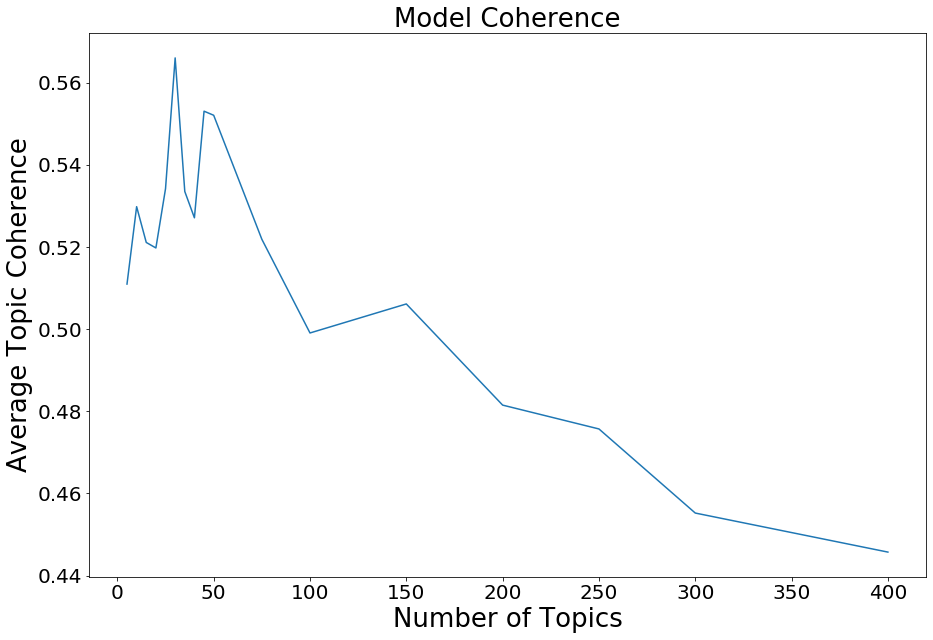

In [46]:
NUM_TOPICS_LIST = [5,10,15,20,25,30,35,40,45,50,75,100,150,200,250,300,400]

plt.figure(figsize=(15,10))
plt.plot(lda_models['num_topics'], lda_models['avg_topic_coherence'])
plt.xlabel('Number of Topics')
plt.ylabel('Average Topic Coherence')
plt.title('Model Coherence')

SMALL_SIZE = 20
MEDIUM_SIZE = 26
SUPER_SMALL = 9

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.savefig('images/model_coherence_abs.png')